# 신경망 모델에서 옵티마이저 사용법
### 이진분류:유방암 예측 사례

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cancer=load_breast_cancer()
cancer_std=StandardScaler().fit_transform(cancer.data)
X_train,X_test,y_train,y_test=train_test_split(
    cancer_std,cancer.target,stratify=cancer.target,
    test_size=0.2, random_state=2022
)

### 1.Adam optimizer

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid')                    
])

#### Adam 하이퍼 파라메터
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다


In [5]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,
          epsilon=None, decay=0.0, amsgrad=False)

In [6]:
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
hist=model.fit(X_train,y_train,validation_split=0.2,
               epochs=100, batch_size=100, verbose=0)

In [8]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0962 - accuracy: 0.9737


[0.09615538269281387, 0.9736841917037964]

In [9]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1,len(y_acc)+1)

- 2.RMSprop

#### RMSprop 하이퍼 파라메터
- lr: 0보다 크거나 같은 float 값. 학습률.
- rho: 0보다 크거나 같은 float 값.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.


In [10]:
model2 = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid')                    
])

In [11]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(learning_rate=0.001,rho=0.9,epsilon=None,decay=0.0)

In [12]:
model2.compile(rmsp,'binary_crossentropy',['accuracy'])

In [13]:
hist2=model2.fit(X_train,y_train,validation_split=0.2,
               epochs=100, batch_size=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 0.5593 - accuracy: 0.7253 - val_loss: 0.3738 - val_accuracy: 0.9011 - 1s/epoch - 281ms/step
Epoch 2/100
4/4 - 0s - loss: 0.3457 - accuracy: 0.9066 - val_loss: 0.2993 - val_accuracy: 0.9121 - 38ms/epoch - 10ms/step
Epoch 3/100
4/4 - 0s - loss: 0.2751 - accuracy: 0.9203 - val_loss: 0.2549 - val_accuracy: 0.9231 - 36ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2301 - accuracy: 0.9286 - val_loss: 0.2207 - val_accuracy: 0.9341 - 37ms/epoch - 9ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1982 - accuracy: 0.9368 - val_loss: 0.1948 - val_accuracy: 0.9451 - 40ms/epoch - 10ms/step
Epoch 6/100
4/4 - 0s - loss: 0.1722 - accuracy: 0.9451 - val_loss: 0.1752 - val_accuracy: 0.9451 - 37ms/epoch - 9ms/step
Epoch 7/100
4/4 - 0s - loss: 0.1513 - accuracy: 0.9533 - val_loss: 0.1603 - val_accuracy: 0.9670 - 37ms/epoch - 9ms/step
Epoch 8/100
4/4 - 0s - loss: 0.1347 - accuracy: 0.9643 - val_loss: 0.1493 - val_accuracy: 0.9670 - 36ms/epoch - 9ms/step
Epoch 9/100
4/4 - 0s - loss: 0

In [14]:
model2.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9649


[0.10621459782123566, 0.9649122953414917]

In [15]:
y_acc2=hist2.history['accuracy']
y_vloss2=hist2.history['val_loss']
xs=np.arange(1,len(y_acc2)+1)

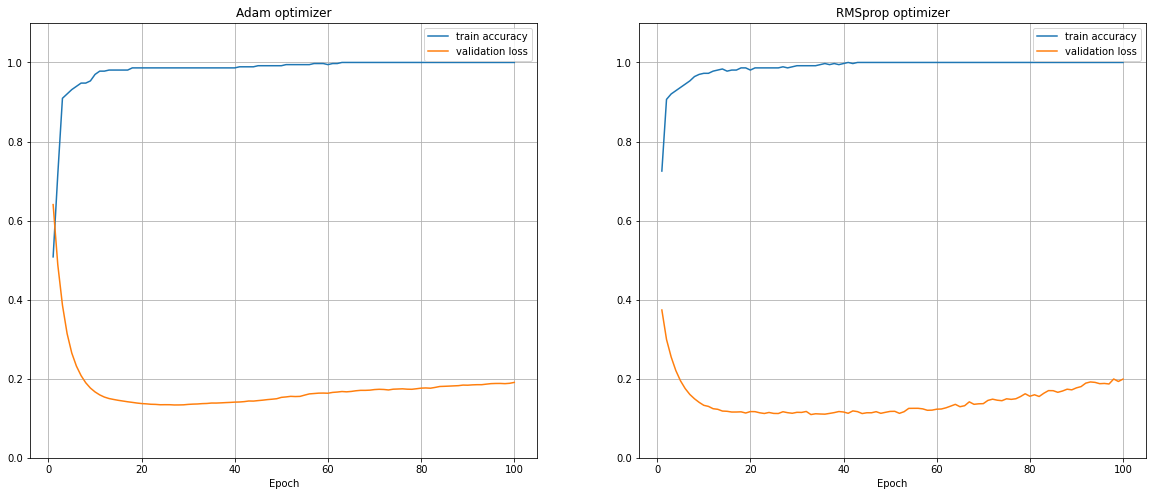

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')
plt.show()